In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import pylab as p
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./Data/release_data.csv')



In [4]:
df.sample()

,release_id,country,year,genre,format
6703812,5910263,US,1989.0,"Folk, World, & Country",Vinyl


In [5]:
df.isna().sum()

release_id          0
country        454549
year          2164324
genre               3
format              0
dtype: int64

In [6]:
print(df.columns)

Index(['release_id', 'country', 'year', 'genre', 'format'], dtype='object')


In [7]:
df.dropna(subset =["year"] , inplace = True)

In [8]:
#df["country"].unique()

In [9]:
df.dropna(subset =["country"] , inplace = True)

In [10]:
df_year = df[(df["year"] < 1910 )]
df_year.head()

,release_id,country,year,genre,format
974778,1016982,Russia,1903.0,Classical,Shellac
978473,1020499,US,1897.0,Jazz,Shellac
1270400,1289378,France,1860.0,Children's,All Media
1290169,1307084,US,1904.0,Jazz,Cylinder
1290194,1307106,US,1899.0,Brass & Military,Cylinder


In [11]:
df_year.isna().sum()

release_id    0
country       0
year          0
genre         0
format        0
dtype: int64

In [12]:
group = df.groupby(by = ["year"]), ["format"].count("format")



In [13]:
df["format"].unique()

array(['Vinyl', 'CD', 'Cassette', 'Box Set', 'All Media', 'File',
       'Floppy Disk', 'Flexi-disc', 'DAT', 'Minidisc', 'DVD', 'Lathe Cut',
       'CDV', 'Hybrid', 'VHS', 'Acetate', 'SACD', 'DVDr', 'Shellac',
       '8-Track Cartridge', 'MVD', 'Laserdisc', 'Reel-To-Reel',
       'Memory Stick', 'Betamax', 'DCC', 'UMD', 'Microcassette', 'HD DVD',
       'Blu-ray', 'Cylinder', 'DualDisc', 'Edison Disc',
       '4-Track Cartridge', 'Pathé Disc', 'VHD', 'Blu-ray-R', 'U-matic',
       'Film Reel', 'SelectaVision', 'MiniDV', 'Video8', 'Betacam SP',
       'PlayTape', 'Video 2000', 'Elcaset', 'Wire Recording',
       'NT Cassette', 'Betacam', 'Tefifon', 'RCA Tape Cartridge',
       'Pocket Rocker', 'DC-International', 'Cartrivision', 'HD DVD-R'],
      dtype=object)

In [14]:
types= ['All Media', 'File',
       'Floppy Disk', 'DVD', 'Hybrid', 'VHS', 'DVDr',
       '8-Track Cartridge', 'Reel-To-Reel',
       'Memory Stick', 'Betamax', 'HD DVD','Cylinder',
       '4-Track Cartridge', 'VHD', 'Blu-ray-R', 'U-matic',
       'Film Reel', 'SelectaVision', 'MiniDV', 'Video8', 'Betacam SP',
       'PlayTape', 'Video 2000', 'Wire Recording','Betacam', 'Tefifon',
       'Pocket Rocker', 'Cartrivision', 'HD DVD-R','RCA Tape Cartridge','UMD','Box Set','CDV','Flexi-disc']

In [15]:
new_df = df[df["format"].str.contains('|'.join(types)) == False]


In [16]:
new_df["format"].unique()

array(['Vinyl', 'CD', 'Cassette', 'DAT', 'Minidisc', 'Lathe Cut',
       'Acetate', 'SACD', 'Shellac', 'MVD', 'Laserdisc', 'DCC',
       'Microcassette', 'Blu-ray', 'DualDisc', 'Edison Disc',
       'Pathé Disc', 'Elcaset', 'NT Cassette', 'DC-International'],
      dtype=object)

In [6]:
#acetate = new_df.query('format == "Acetate"')


In [7]:
#acetate[(acetate["year"] > 1930)]


In [17]:
new_df = new_df.replace(to_replace=['Lathe Cut', 'Acetate','Edison Disc','Pathé Disc'],
           value="Vinyl")

In [18]:
new_df = new_df.replace(to_replace=['Minidisc', 'MVD','Laserdisc','DCC','SACD', 'Blu-ray','DualDisc'],
           value="CD")

In [19]:
new_df = new_df.replace(to_replace=['DC-International', 'NT Cassette','Elcaset','Microcassette','DAT', 'Blu-ray','DualDisc'],
           value='Cassette')

In [20]:
new_df["format"].unique()

array(['Vinyl', 'CD', 'Cassette', 'Shellac'], dtype=object)

In [21]:
new_df["genre"].unique()

array(['Electronic', 'Hip Hop', 'Non-Music', 'Jazz', 'Rock', 'Latin',
       'Funk / Soul', 'Stage & Screen', 'Pop', 'Reggae',
       'Folk, World, & Country', 'Classical', 'Blues', 'Brass & Military',
       "Children's", nan], dtype=object)

In [22]:
new_df["format"].value_counts()

Vinyl       6440942
CD          5363037
Cassette    1070527
Shellac      190533
Name: format, dtype: int64

In [23]:
new_df['year'].min()


1889.0

In [24]:
global_release = new_df[(new_df["year"] > 1950 )]


In [25]:
global_release.to_csv("./Data/format_release.csv", index = False)

In [26]:
global_release.year = global_release.year.apply(lambda x: int(x))

C:\Users\34603\AppData\Local\Temp\ipykernel_2740\255950573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_release.year = global_release.year.apply(lambda x: int(x))


In [27]:
global_release

,release_id,country,year,genre,format
0,1,Sweden,1999,Electronic,Vinyl
1,2,Sweden,1998,Electronic,Vinyl
2,3,US,1999,Electronic,CD
3,4,US,1999,Electronic,CD
4,5,Germany,1995,Electronic,CD
...,...,...,...,...,...
17372030,15731745,Peru,1980,Pop,Vinyl
17372031,15731748,Mexico,1975,Latin,Vinyl
17372032,15731752,Czech Republic,2020,Electronic,Vinyl
17372033,15731758,Canada,2007,Electronic,Vinyl


In [28]:
my_df = global_release

In [29]:
global_release = my_df.groupby(['year']).count()
global_release.head()

,release_id,country,genre,format
year,,,,
1951,12668,12668,12668,12668
1952,14583,14583,14583,14583
1953,18403,18403,18403,18403
1954,22926,22926,22926,22926
1955,29670,29670,29670,29670


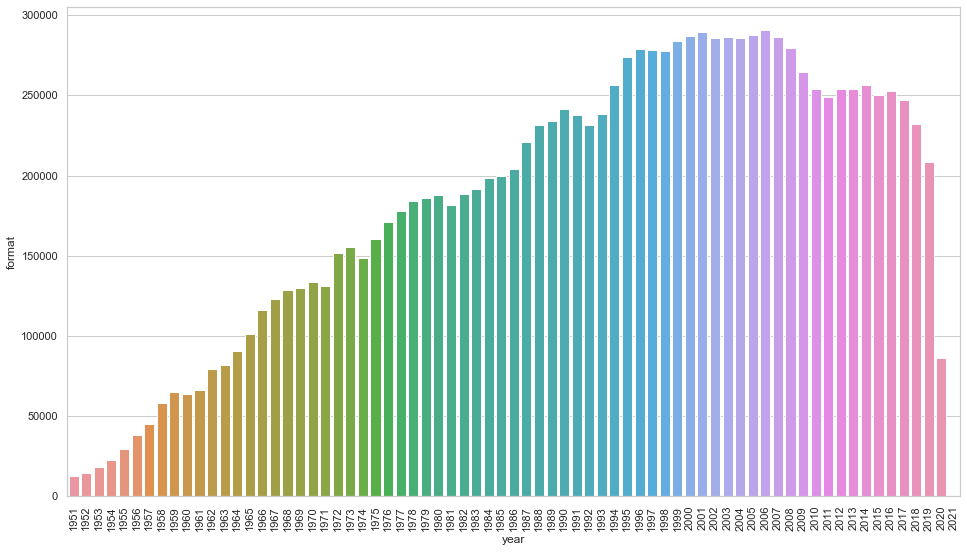

In [30]:
sns.barplot(data=global_release, x=global_release.index, y="format")
plt.xticks(rotation=90);

In [104]:
#sns.lineplot(data=genre_df, x="genre", y="year", hue="format")

In [37]:
df_test = new_df[(new_df["year"] == 2020 )]


In [39]:
df_test.query('format == "Vinyl"')


,release_id,country,year,genre,format
388237,404432,US,2020.0,Electronic,Vinyl
3739010,3314744,Colombia,2020.0,Latin,Vinyl
4973680,4358274,Denmark,2020.0,Electronic,Vinyl
7392532,6531848,Colombia,2020.0,Latin,Vinyl
9427439,8410495,Norway,2020.0,Electronic,Vinyl
...,...,...,...,...,...
17371994,15731700,Poland,2020.0,Rock,Vinyl
17372007,15731712,Sweden,2020.0,Rock,Vinyl
17372008,15731713,Czech Republic,2020.0,Electronic,Vinyl
17372015,15731725,US,2020.0,Hip Hop,Vinyl


In [ ]:
df_test["format"]

In [41]:
global_release

,release_id,country,year,genre
format,,,,
CD,5363037,5363037,5363037,5363037
Cassette,1070527,1070527,1070527,1070527
Shellac,49003,49003,49003,49003
Vinyl,6425992,6425992,6425992,6425990
